<a href="https://colab.research.google.com/github/kottusaikumar/python_june_24th_batch/blob/main/ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy import stats
import os
import matplotlib.pyplot as plt
import sklearn
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import kneighbors_graph
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve , roc_auc_score

In [ ]:
df=pd.read_csv("/content/creditcard.csv")
df

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN


In [ ]:
df.shape

(150002, 18)

In [ ]:
df=df.drop([150000	,150001	],axis=0)

In [ ]:
df.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,29731
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [ ]:
df["NumberOfDependents"]=pd.to_numeric(df["NumberOfDependents"])
df["NumberOfDependents"].dtype

dtype('float64')

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.0,0.040674,74.0,Male,North,2100.0,Ownhouse,Non-officer,Professional,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149996,0.0,0.299745,44.0,Male,North,5584.0,Ownhouse,Self_Emp,Professional,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0.0
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
len(X_train),len(y_train)

(135000, 135000)

In [ ]:
len(X_test),len(y_test)

(15000, 15000)

In [ ]:
c=[]
for i in X_train.index:
  if np.isnan(X_train["MonthlyIncome"][i])==np.isnan(X_train["MonthlyIncome.1"][i]):
    pass
  elif X_train["MonthlyIncome"][i]==X_train["MonthlyIncome.1"][i]:
    pass
  else:
    c.append(i)
if len(c)>0:
  print(len(c))
  print("not same")
else:
  print("same")


same


In [ ]:
X_train=X_train.drop(["MonthlyIncome.1"],axis=1)
X_test=X_test.drop(["MonthlyIncome.1"],axis=1)

In [ ]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,26738
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
def random_sample(X_train, var):
    X_train[var + "replace"] = X_train[var].copy()

    s = X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=42)
    #print(s)
    s.index = X_train[X_train[var].isnull()].index
    #print(s.index)

    X_train.loc[X_train[X_train[var].isnull()].index, var +"replace"] = s
    #print(X_train.loc[X_train[X_train[var].isnull()].index, var + "replace"])


In [ ]:
col=["MonthlyIncome","NumberOfDependents"]

for i in col:
  random_sample(X_train,i)

In [ ]:
X_train.head(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomereplace,NumberOfDependentsreplace
135986,0.0,0.582945,39.0,Male,West,NaN,Rented,Self_Emp,Professional,0.0,127.000000,3.0,0.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,Female,East,3060.0,Rented,Officer1,Post-Grad,0.0,0.284874,5.0,0.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,Male,South,15833.0,Ownhouse,Self_Emp,Professional,1.0,0.484148,16.0,0.0,3.0,0.0,1.0,15833.0,1.0
57742,0.0,0.715410,43.0,Male,East,5882.0,Ownhouse,Officer3,Professional,0.0,0.135305,11.0,0.0,0.0,0.0,1.0,5882.0,1.0
43651,0.0,0.000000,49.0,Male,North,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,871.000000,21.0,0.0,2.0,0.0,4.0,8137.0,4.0
21898,0.0,0.052705,27.0,Male,North,NaN,Rented,Non-officer,Graduate,0.0,2025.000000,8.0,0.0,2.0,0.0,NaN,6930.0,0.0
66140,0.0,0.001447,50.0,Male,Central,7271.0,Ownhouse,Self_Emp,Professional,1.0,0.582371,8.0,0.0,2.0,0.0,0.0,7271.0,0.0


In [ ]:
X_train.isnull().sum()


,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,26738
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


std of MonthlyIncome feature: 14754.418707270997
std of MonthlyIncomereplace feature: 13745.249004806647
std of NumberOfDependents feature: 1.1146446970540291
std of NumberOfDependentsreplace feature: 1.114732899930453


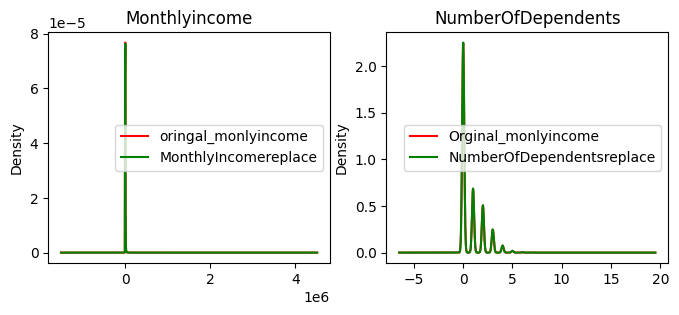

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("Monthlyincome")
X_train["MonthlyIncome"].plot(kind="kde",color="r",label="oringal_monlyincome")
X_train["MonthlyIncomereplace"].plot(kind="kde",color="g",label="MonthlyIncomereplace")
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.title("NumberOfDependents")
X_train["NumberOfDependents"].plot(kind="kde",color="r",label="Orginal_monlyincome")
X_train["NumberOfDependentsreplace"].plot(kind="kde",color="g",label="NumberOfDependentsreplace")
plt.legend(loc=0)
print(f"std of MonthlyIncome feature: {X_train['MonthlyIncome'].std()}")
print(f"std of MonthlyIncomereplace feature: {X_train['MonthlyIncomereplace'].std()}")
print(f"std of NumberOfDependents feature: {X_train['NumberOfDependents'].std()}")
print(f"std of NumberOfDependentsreplace feature: {X_train['NumberOfDependentsreplace'].std()}")
plt.show()


In [ ]:
def random_sample(X_test, var):
    X_test[var + "replace"] = X_test[var].copy()

    s = X_test[var].dropna().sample(X_test[var].isnull().sum(), random_state=42)
    #print(s)
    s.index = X_test[X_test[var].isnull()].index
    #print(s.index)

    X_test.loc[X_test[X_test[var].isnull()].index, var +"replace"] = s
    #print(X_train.loc[X_train[X_train[var].isnull()].index, var + "replace"])


In [ ]:
col=["MonthlyIncome","NumberOfDependents"]

for i in col:
  random_sample(X_test,i)

In [ ]:
X_test.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,2993
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


std of MonthlyIncome feature: 10477.73724208986
std of MonthlyIncomereplace feature: 9668.675725547122
std of NumberOfDependents feature: 1.118886446230451
std of NumberOfDependentsreplace feature: 1.1207439929825909


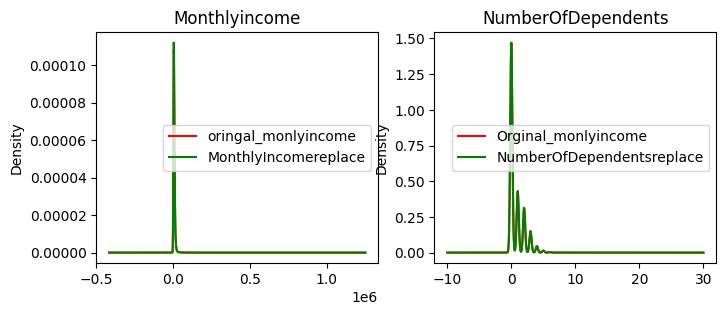

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("Monthlyincome")
X_test["MonthlyIncome"].plot(kind="kde",color="r",label="oringal_monlyincome")
X_test["MonthlyIncomereplace"].plot(kind="kde",color="g",label="MonthlyIncomereplace")
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.title("NumberOfDependents")
X_test["NumberOfDependents"].plot(kind="kde",color="r",label="Orginal_monlyincome")
X_test["NumberOfDependentsreplace"].plot(kind="kde",color="g",label="NumberOfDependentsreplace")
plt.legend(loc=0)
print(f"std of MonthlyIncome feature: {X_test['MonthlyIncome'].std()}")
print(f"std of MonthlyIncomereplace feature: {X_test['MonthlyIncomereplace'].std()}")
print(f"std of NumberOfDependents feature: {X_test['NumberOfDependents'].std()}")
print(f"std of NumberOfDependentsreplace feature: {X_test['NumberOfDependentsreplace'].std()}")
plt.show()


In [ ]:
X_train=X_train.drop(['MonthlyIncome','NumberOfDependents'],axis=1)
X_test=X_test.drop(['MonthlyIncome','NumberOfDependents'],axis=1)

In [ ]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0


In [ ]:
X_train_num_col=X_train.select_dtypes(exclude="object")
X_train_cat_col=X_train.select_dtypes(include="object")
X_test_num_col=X_test.select_dtypes(exclude="object")
X_test_cat_col=X_test.select_dtypes(include="object")


In [ ]:
X_train_cat_col

,Gender,Region,Rented_OwnHouse,Occupation,Education
135986,Male,West,Rented,Self_Emp,Professional
48361,Female,East,Rented,Officer1,Post-Grad
146561,Male,South,Ownhouse,Self_Emp,Professional
57742,Male,East,Ownhouse,Officer3,Professional
43651,Male,North,Ownhouse,Self_Emp,Post-Grad
...,...,...,...,...,...
119879,Male,West,Ownhouse,Self_Emp,Graduate
103694,Male,West,Ownhouse,Self_Emp,PhD
131932,Male,East,Rented,Officer1,Professional
146867,Male,South,Rented,Self_Emp,Professional


In [ ]:
X_train_cat_col.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(handle_unknown="ignore")
one_hot.fit(X_train_cat_col[['Gender', 'Region']])
f = one_hot.transform(X_train_cat_col[['Gender', 'Region']]).toarray()
label_names=one_hot.get_feature_names_out(['Gender','Region'])
v=pd.DataFrame(data=f,columns=label_names)
X_train_cat_col=pd.concat([X_train_cat_col,v],axis=1)
X_train_cat_col


,Gender,Region,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,Male,West,Rented,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Female,East,Rented,Officer1,Post-Grad,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Male,South,Ownhouse,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Male,East,Ownhouse,Officer3,Professional,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Male,North,Ownhouse,Self_Emp,Post-Grad,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134995,Male,West,Ownhouse,Self_Emp,Graduate,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134996,Male,West,Ownhouse,Self_Emp,PhD,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134997,Male,East,Rented,Officer1,Professional,0.0,1.0,0.0,1.0,0.0,0.0,0.0
134998,Male,South,Rented,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
pd.DataFrame(data=f,columns=label_names)

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134996,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134997,0.0,1.0,0.0,1.0,0.0,0.0,0.0
134998,0.0,1.0,0.0,0.0,0.0,1.0,0.0


we are going touse odinal encoding columns on Rented_ownhouse,occupation and education feature


In [ ]:
X_train_cat_col.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

od_en=OrdinalEncoder()

od_en.fit(X_train_cat_col[['Rented_OwnHouse',	'Occupation',	'Education']])

p=od_en.transform(X_train_cat_col[['Rented_OwnHouse',	'Occupation',	'Education']])

f=pd.DataFrame(data=p)
f.columns=od_en.get_feature_names_out()
f


,Rented_OwnHouse,Occupation,Education
0,1.0,4.0,4.0
1,1.0,1.0,3.0
2,0.0,4.0,4.0
3,0.0,3.0,4.0
4,0.0,4.0,3.0
...,...,...,...
134995,0.0,4.0,0.0
134996,0.0,4.0,2.0
134997,1.0,1.0,4.0
134998,1.0,4.0,4.0


In [ ]:
X_train_cat_col.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Gender_Female', 'Gender_Male', 'Region_Central', 'Region_East',
       'Region_North', 'Region_South', 'Region_West'],
      dtype='object')

In [ ]:
X_train_cat_col = X_train_cat_col.drop(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'],axis=1)
X_train_cat_col


,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134996,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134997,0.0,1.0,0.0,1.0,0.0,0.0,0.0
134998,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_cat_col=pd.concat([X_train_cat_col,f],axis=1)
X_train_cat_col

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
134996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
134997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0
134998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,4.0


In [ ]:
X_test_cat_col

,Gender,Region,Rented_OwnHouse,Occupation,Education
59770,Male,Central,Rented,Self_Emp,Professional
21362,Female,North,Rented,Officer3,Post-Grad
127324,Female,East,Rented,Officer1,Post-Grad
140509,Male,West,Rented,Non-officer,Professional
144297,Male,West,Rented,Officer2,Professional
...,...,...,...,...,...
90394,Male,Central,Ownhouse,Non-officer,Graduate
53959,Male,East,Rented,Officer3,Professional
124099,Female,East,Rented,Officer1,Post-Grad
7060,Male,South,Ownhouse,Self_Emp,Matric


In [ ]:
p=one_hot.transform(X_test_cat_col[['Gender','Region']]).toarray()
f=od_en.transform(X_test_cat_col[['Rented_OwnHouse',	'Occupation',	'Education']])
p

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
p_=pd.DataFrame(data=p)
p_.columns=one_hot.get_feature_names_out()
p_

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
14995,0.0,1.0,1.0,0.0,0.0,0.0,0.0
14996,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14997,1.0,0.0,0.0,1.0,0.0,0.0,0.0
14998,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
f_=pd.DataFrame(data=f)
f_.columns=od_en.get_feature_names_out()
f_

,Rented_OwnHouse,Occupation,Education
0,1.0,4.0,4.0
1,1.0,3.0,3.0
2,1.0,1.0,3.0
3,1.0,0.0,4.0
4,1.0,2.0,4.0
...,...,...,...
14995,0.0,0.0,0.0
14996,1.0,3.0,4.0
14997,1.0,1.0,3.0
14998,0.0,4.0,1.0


In [ ]:
X_test_cat_col=pd.concat([p_,f_],axis=1)
X_test_cat_col

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
14995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0
14997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
14998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0


In [ ]:
# now X_train_num_col and X_test_num_col
#finding whether num_cols from X_train and X_test ND-> not

In [ ]:
X_train_num_col

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncomereplace,NumberOfDependentsreplace
135986,0.0,0.582945,39.0,0.0,127.000000,3.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,0.0,0.284874,5.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,1.0,0.484148,16.0,0.0,3.0,0.0,15833.0,1.0
57742,0.0,0.715410,43.0,0.0,0.135305,11.0,0.0,0.0,0.0,5882.0,1.0
43651,0.0,0.000000,49.0,0.0,871.000000,21.0,0.0,2.0,0.0,8137.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.003175,44.0,0.0,0.367863,7.0,1.0,2.0,0.0,10000.0,3.0
103694,0.0,0.087697,67.0,1.0,1781.000000,10.0,0.0,1.0,0.0,7400.0,1.0
131932,0.0,0.068788,49.0,0.0,0.673331,8.0,0.0,2.0,0.0,2800.0,0.0
146867,0.0,0.219630,36.0,0.0,0.025316,2.0,0.0,0.0,0.0,1500.0,0.0


In [ ]:
def fun(data_c,var):
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind="kde")

  plt.subplot(1,3,2)
  sns.boxplot(x=data_c[var])

  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist="norm",plot=plt)
  plt.show()

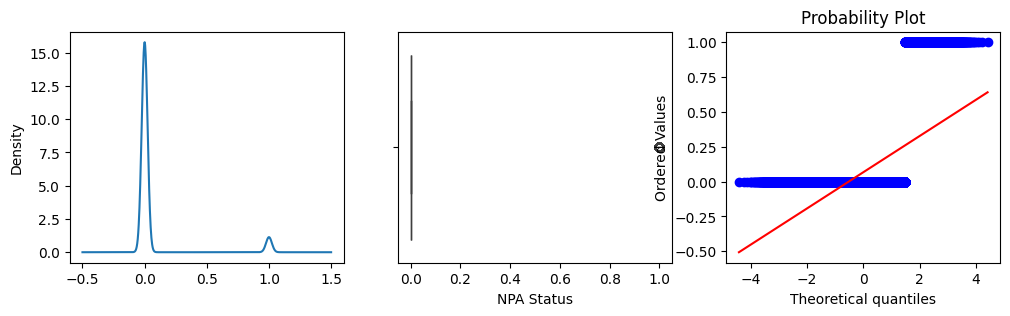

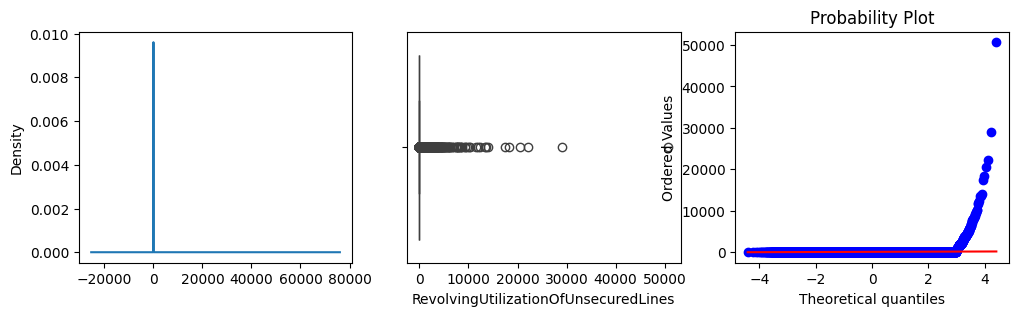

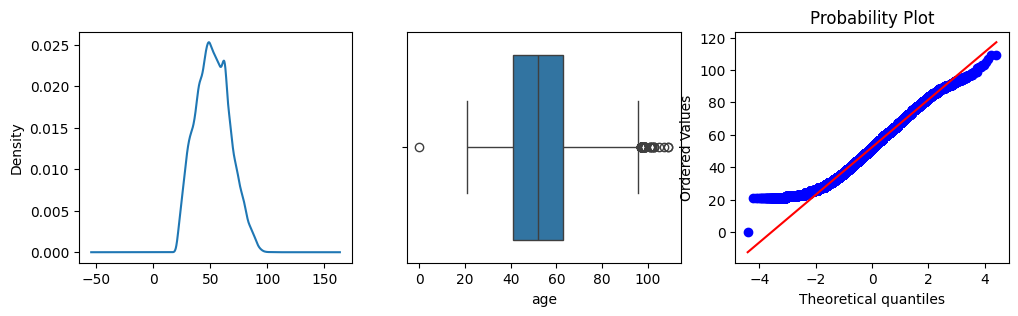

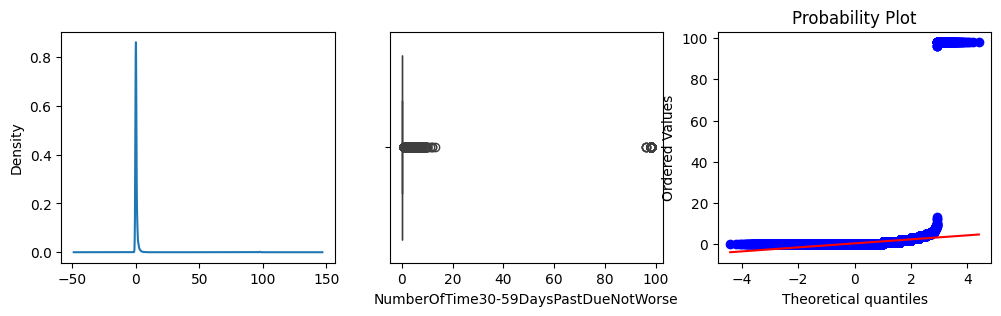

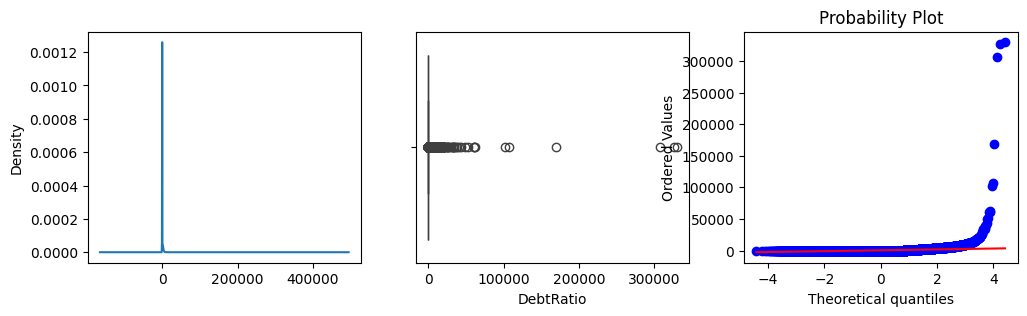

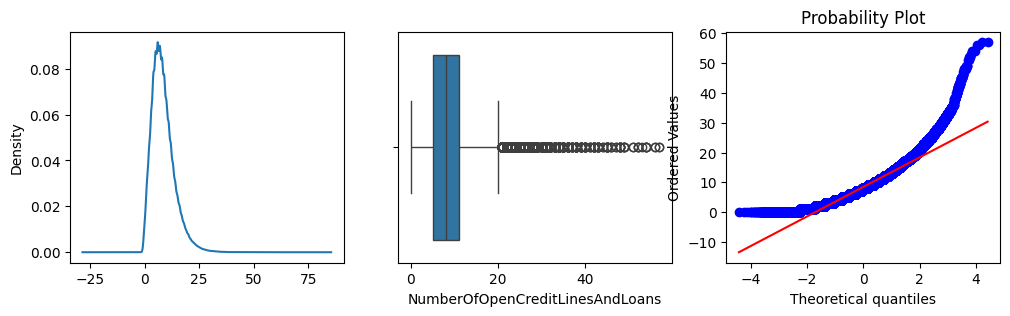

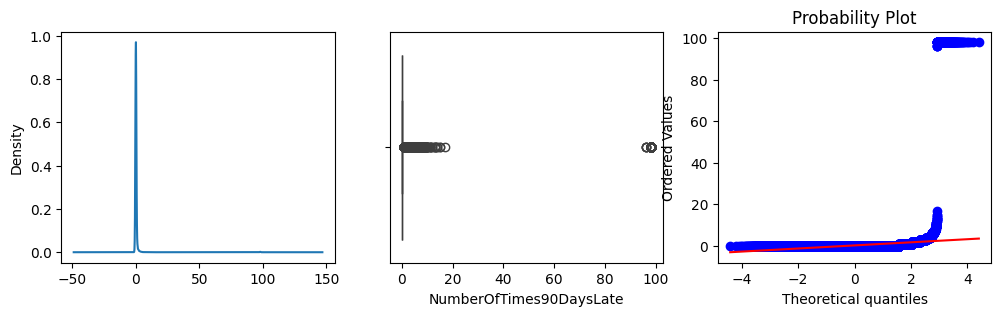

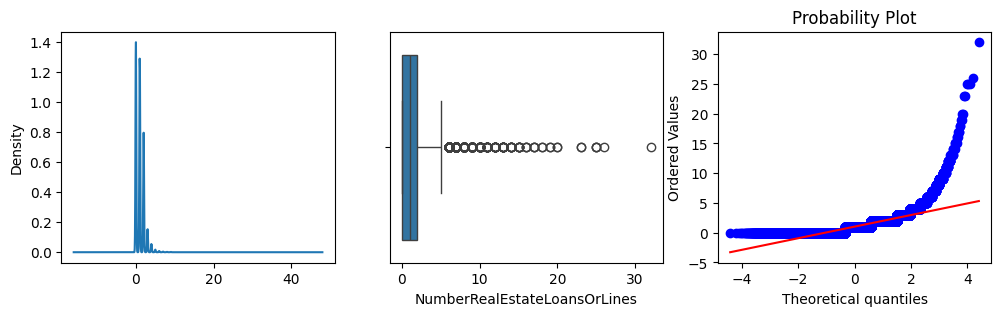

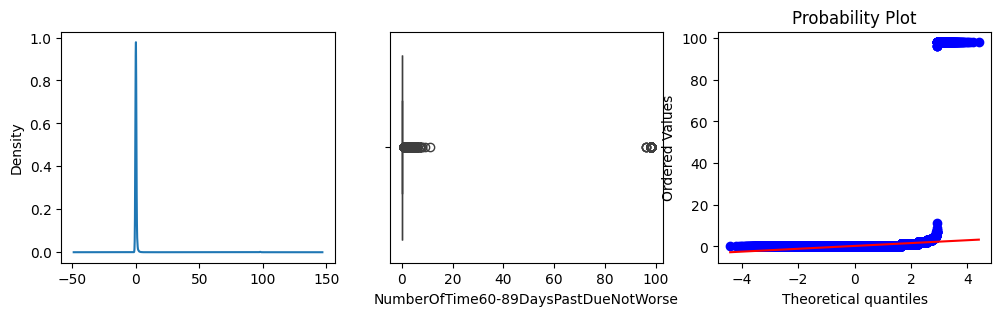

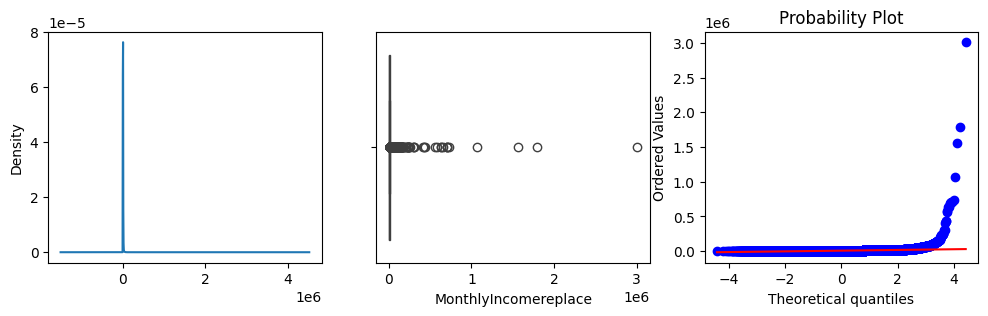

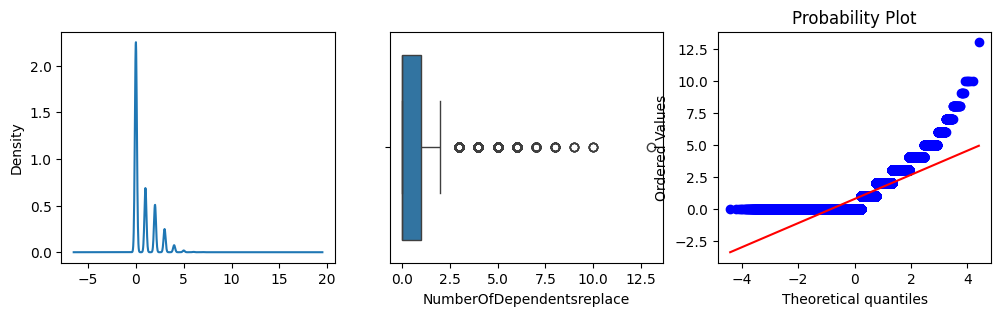

In [ ]:
for i in X_train_num_col.columns:
  fun(X_train_num_col,i)

In [ ]:
# apply the Log for X_train_num_col to main normal Distribution and reduce the outlier
X_train_num_col

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncomereplace,NumberOfDependentsreplace
135986,0.0,0.582945,39.0,0.0,127.000000,3.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,0.0,0.284874,5.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,1.0,0.484148,16.0,0.0,3.0,0.0,15833.0,1.0
57742,0.0,0.715410,43.0,0.0,0.135305,11.0,0.0,0.0,0.0,5882.0,1.0
43651,0.0,0.000000,49.0,0.0,871.000000,21.0,0.0,2.0,0.0,8137.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.003175,44.0,0.0,0.367863,7.0,1.0,2.0,0.0,10000.0,3.0
103694,0.0,0.087697,67.0,1.0,1781.000000,10.0,0.0,1.0,0.0,7400.0,1.0
131932,0.0,0.068788,49.0,0.0,0.673331,8.0,0.0,2.0,0.0,2800.0,0.0
146867,0.0,0.219630,36.0,0.0,0.025316,2.0,0.0,0.0,0.0,1500.0,0.0


In [ ]:
for i in X_train_num_col.columns:
  X_train_num_col[i+'_Log']=np.log(X_train_num_col[i]+1)

In [ ]:
X_train_num_col.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncomereplace', 'NumberOfDependentsreplace', 'NPA Status_Log',
       'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log'],
      dtype='object')

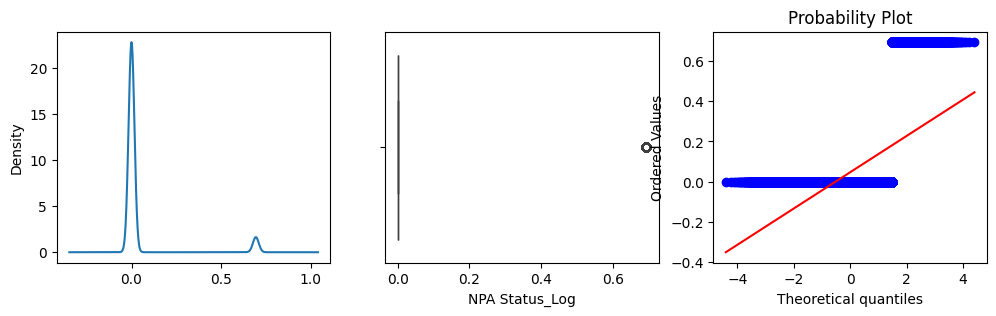

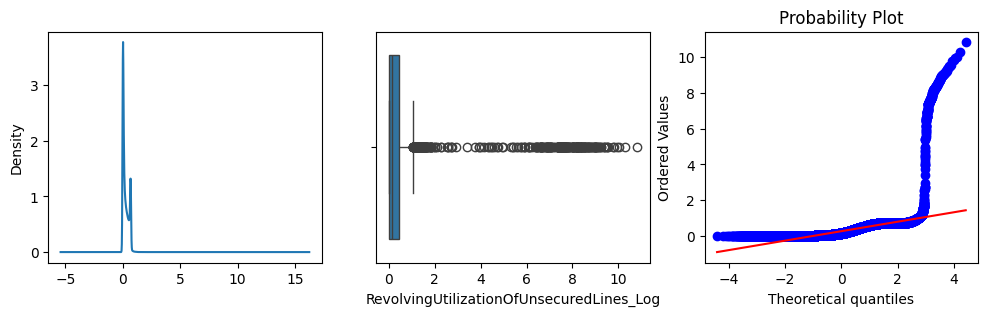

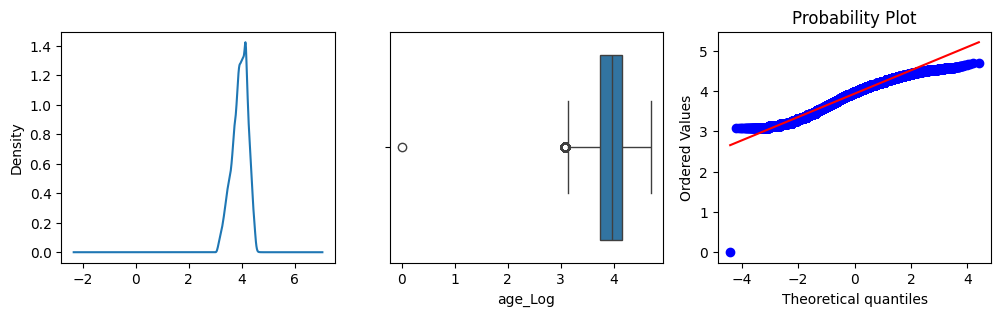

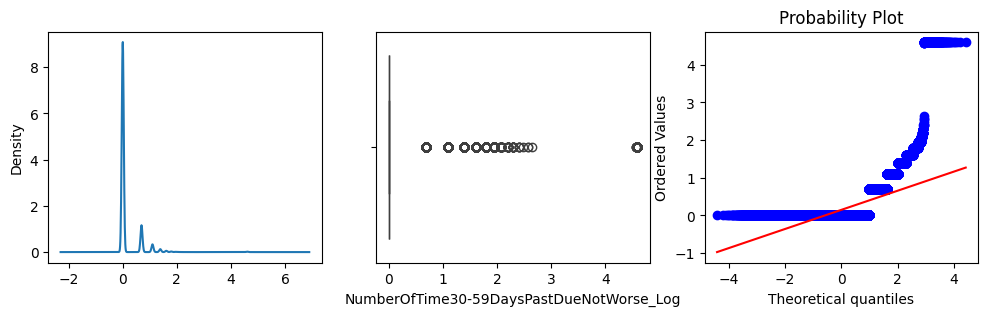

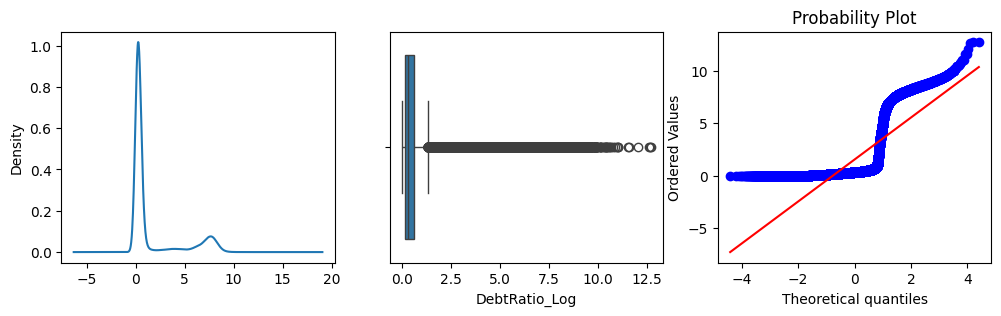

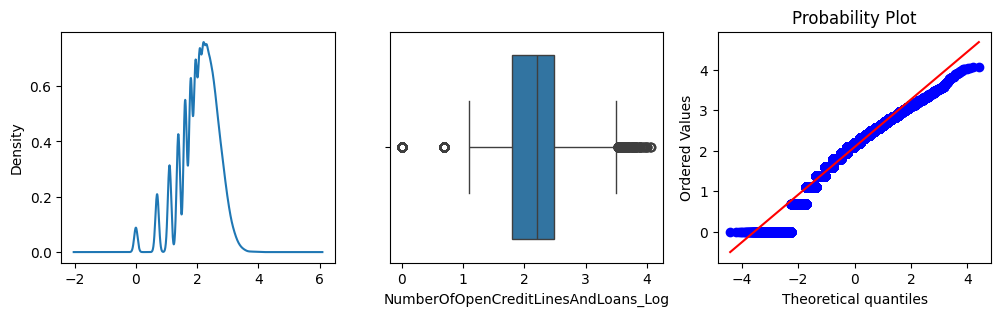

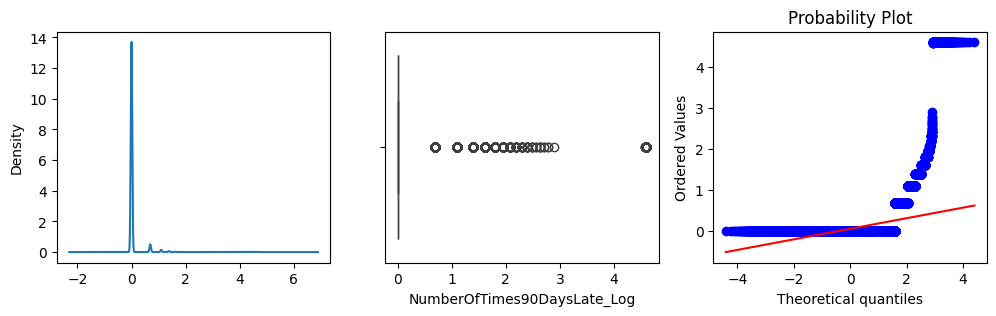

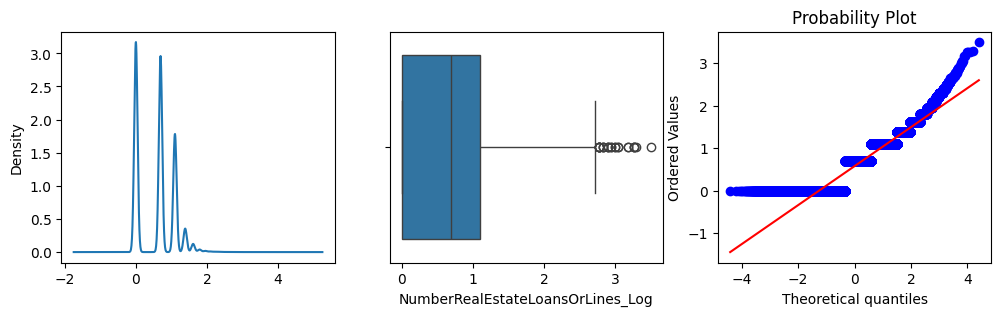

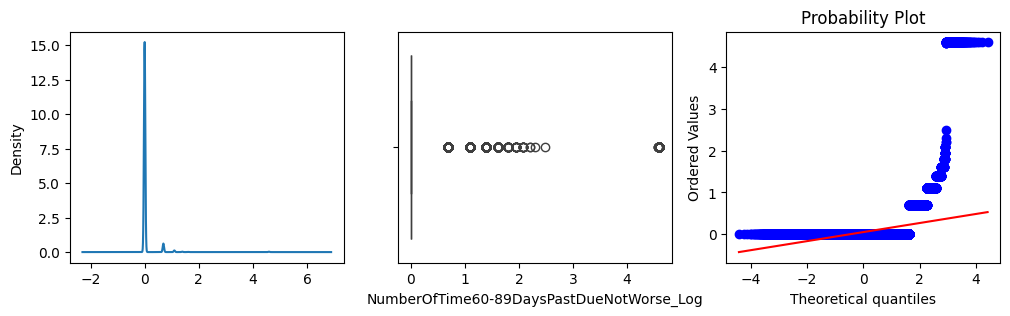

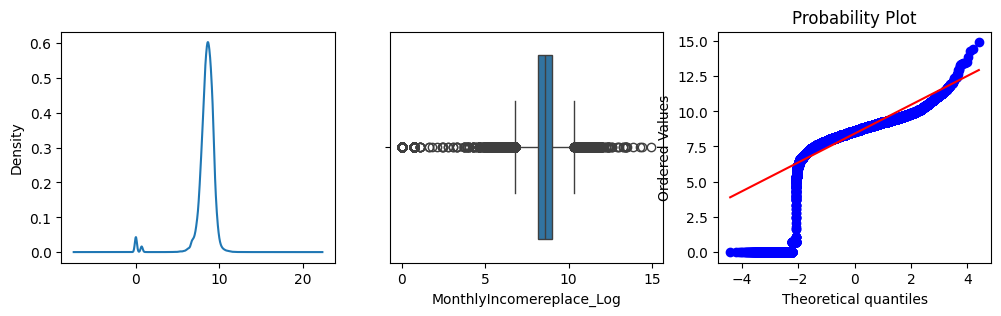

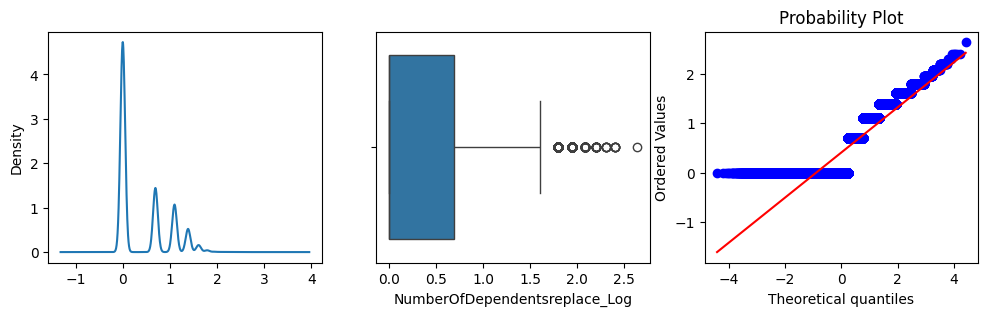

In [ ]:
for i in X_train_num_col.columns:
  if '_Log' in i:
    fun(X_train_num_col,i)


In [ ]:
X_train_num_col.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncomereplace', 'NumberOfDependentsreplace', 'NPA Status_Log',
       'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log'],
      dtype='object')

In [ ]:
X_train_num_col=X_train_num_col.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncomereplace', 'NumberOfDependentsreplace'],axis=1)

In [ ]:
for i in X_test_num_col.columns:
  X_test_num_col[i+'_Log']=np.log(X_test_num_col[i]+1)

In [ ]:
X_test_num_col=X_test_num_col.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncomereplace', 'NumberOfDependentsreplace'],axis=1)

In [ ]:
X_test_num_col.columns

Index(['NPA Status_Log', 'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log'],
      dtype='object')

Handled Outliers

In [ ]:
def han_out(X_train_num_col,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=X_train_num_col[var])

  plt.show()

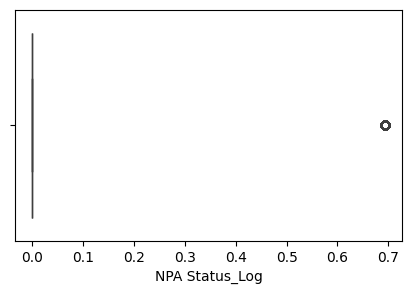

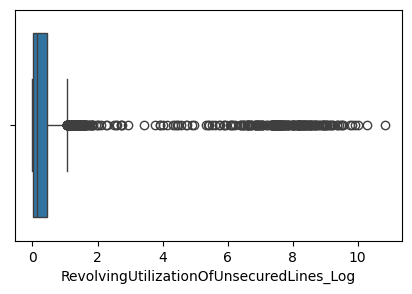

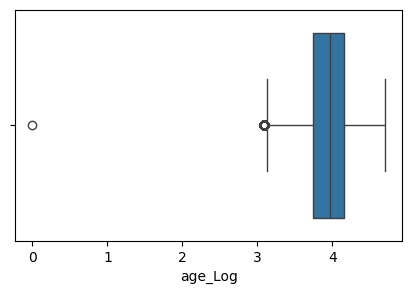

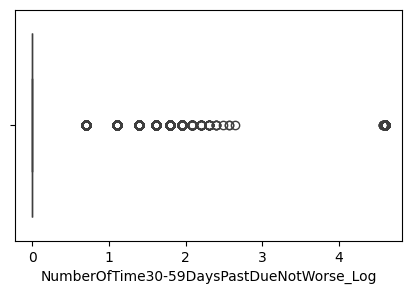

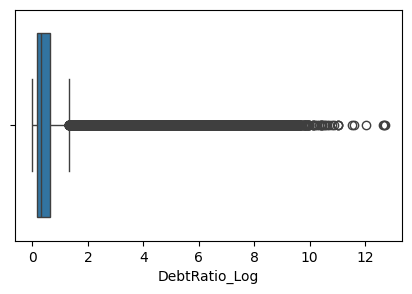

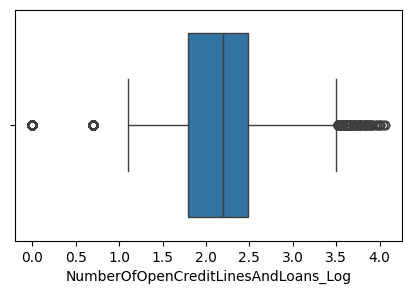

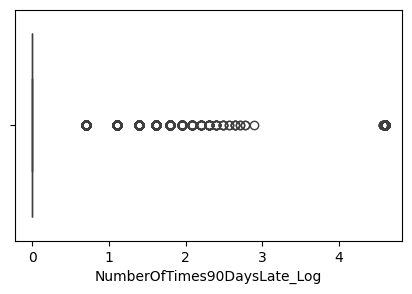

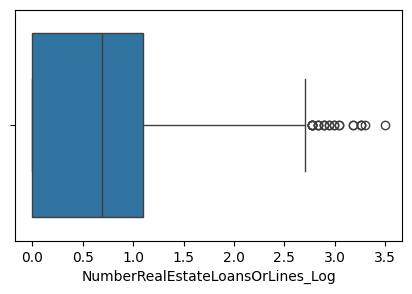

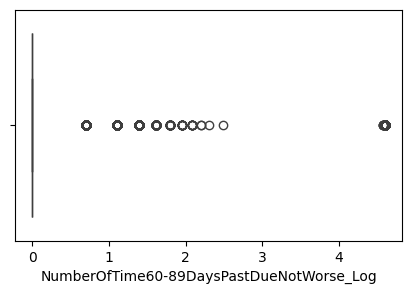

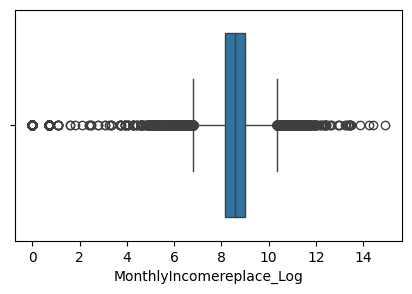

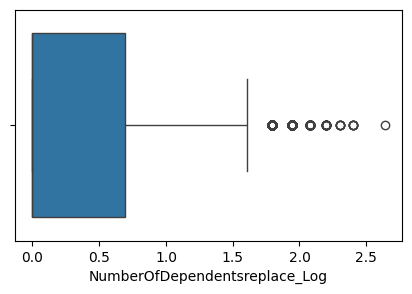

In [ ]:
for i in X_train_num_col.columns:
  han_out(X_train_num_col,i)

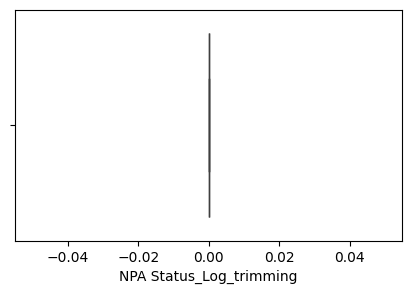

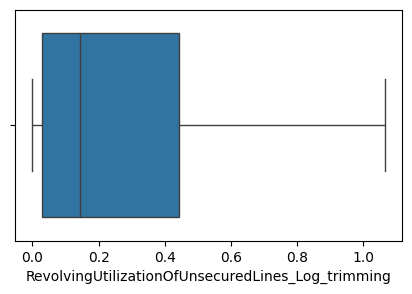

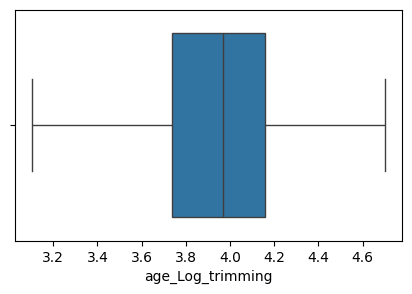

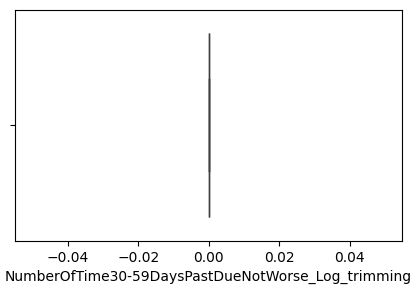

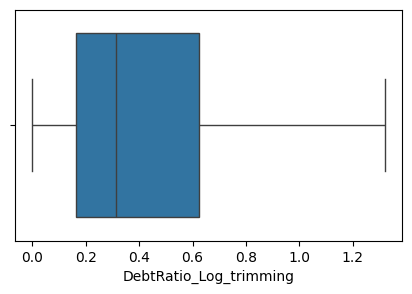

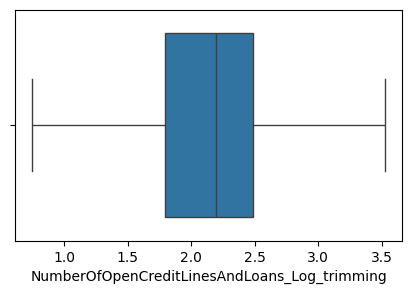

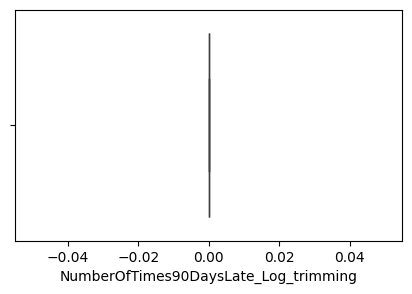

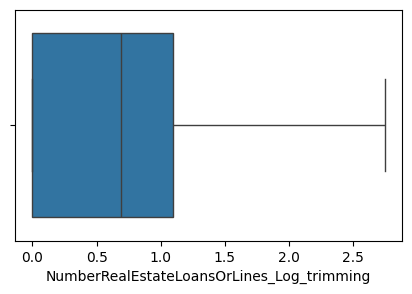

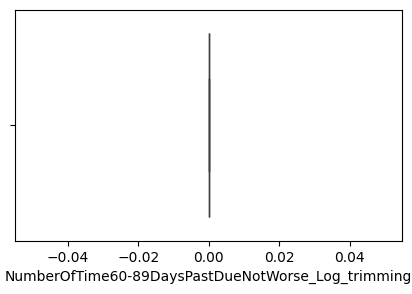

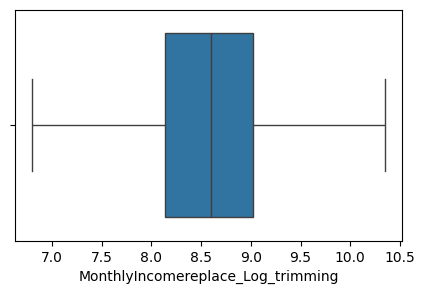

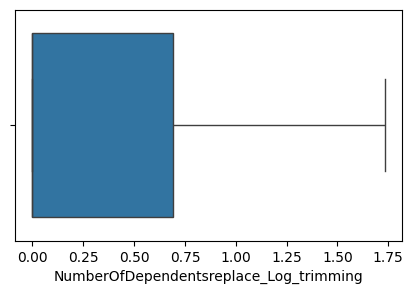

In [ ]:
# Trimming
def fun_1(df, var):
    iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
    upper = df[var].quantile(0.75) + (1.5 * iqr)
    lower = df[var].quantile(0.25) - (1.5 * iqr)
    return upper, lower

for i in X_train_num_col.columns:
    upper_value, lower_value = fun_1(X_train_num_col, i)
    X_train_num_col[i + '_trimming'] = np.where(X_train_num_col[i] > upper_value, upper_value,
                                                np.where(X_train_num_col[i] < lower_value, lower_value,
                                                         X_train_num_col[i]))

for j in X_train_num_col.columns:
    if '_trimming' in j:
        han_out(X_train_num_col, j)


In [ ]:
X_train_num_col.columns

Index(['NPA Status_Log', 'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log', 'NPA Status_Log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_Log_trimming',
       'DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberOfTimes90DaysLate_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming'],
      dtype='object')

In [ ]:
X_train_num_col=X_train_num_col.drop(['NPA Status_Log', 'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log'],axis=1)

In [ ]:
X_train_num_col.columns

Index(['NPA Status_Log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_Log_trimming',
       'DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberOfTimes90DaysLate_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming'],
      dtype='object')

In [ ]:
def han_out(X_test_num_col,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=X_test_num_col[var])

  plt.show()

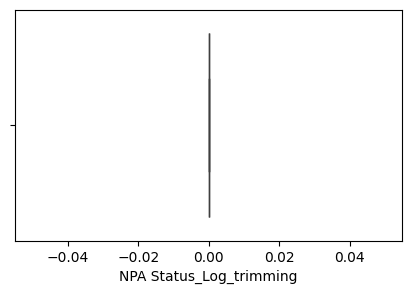

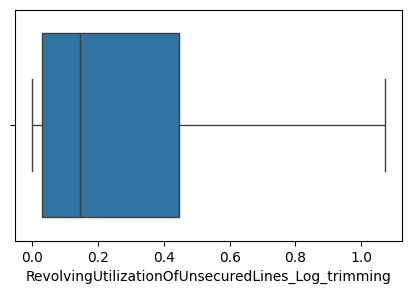

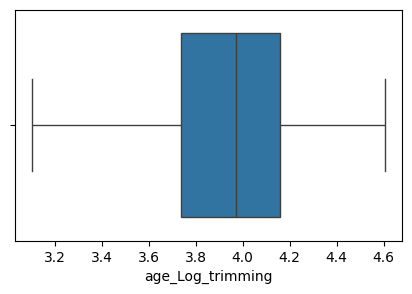

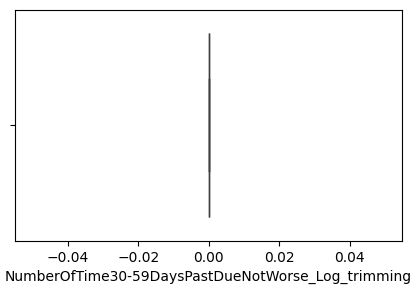

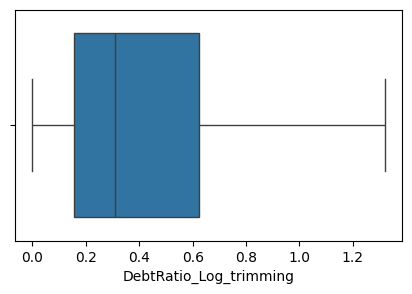

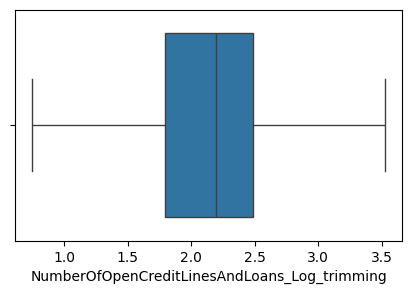

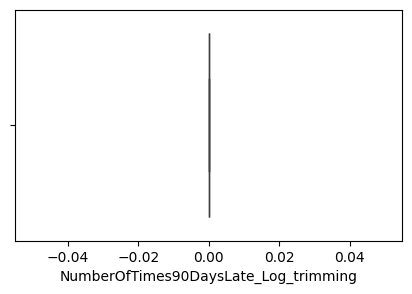

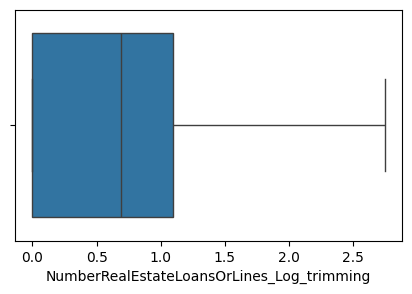

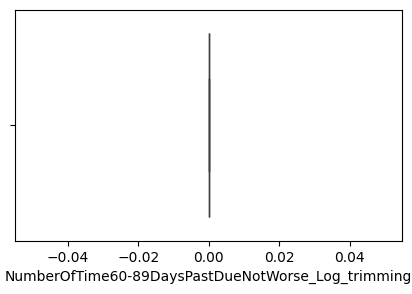

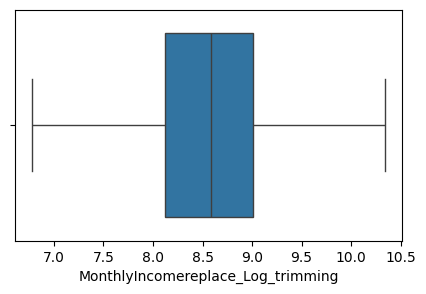

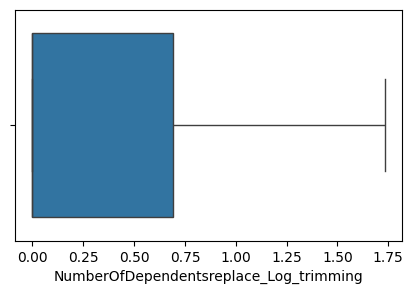

In [ ]:
# X-test
# Trimming
def fun_1(df, var):
    iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
    upper = df[var].quantile(0.75) + (1.5 * iqr)
    lower = df[var].quantile(0.25) - (1.5 * iqr)
    return upper, lower

for i in X_test_num_col.columns:
    upper_value, lower_value = fun_1(X_test_num_col, i)
    X_test_num_col[i + '_trimming'] = np.where(X_test_num_col[i] > upper_value, upper_value,
                                                np.where(X_test_num_col[i] < lower_value, lower_value,
                                                         X_test_num_col[i]))

for j in X_test_num_col.columns:
    if '_trimming' in j:
        han_out(X_test_num_col, j)


In [ ]:
X_test_num_col.columns

Index(['NPA Status_Log', 'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log', 'NPA Status_Log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_Log_trimming',
       'DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberOfTimes90DaysLate_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming'],
      dtype='object')

In [ ]:
X_test_num_col=X_test_num_col.drop(['NPA Status_Log', 'RevolvingUtilizationOfUnsecuredLines_Log', 'age_Log',
       'NumberOfTime30-59DaysPastDueNotWorse_Log', 'DebtRatio_Log',
       'NumberOfOpenCreditLinesAndLoans_Log', 'NumberOfTimes90DaysLate_Log',
       'NumberRealEstateLoansOrLines_Log',
       'NumberOfTime60-89DaysPastDueNotWorse_Log', 'MonthlyIncomereplace_Log',
       'NumberOfDependentsreplace_Log'],axis=1)

In [ ]:
X_test_num_col

,NPA Status_Log_trimming,RevolvingUtilizationOfUnsecuredLines_Log_trimming,age_Log_trimming,NumberOfTime30-59DaysPastDueNotWorse_Log_trimming,DebtRatio_Log_trimming,NumberOfOpenCreditLinesAndLoans_Log_trimming,NumberOfTimes90DaysLate_Log_trimming,NumberRealEstateLoansOrLines_Log_trimming,NumberOfTime60-89DaysPastDueNotWorse_Log_trimming,MonthlyIncomereplace_Log_trimming,NumberOfDependentsreplace_Log_trimming
59770,0.0,0.693147,3.433987,0.0,1.319470,0.752039,0.0,0.000000,0.0,8.944811,0.000000
21362,0.0,0.000000,4.060443,0.0,0.133273,2.302585,0.0,0.693147,0.0,8.955577,0.000000
127324,0.0,0.035916,3.891820,0.0,0.212118,1.945910,0.0,1.098612,0.0,8.699681,1.386294
140509,0.0,0.702271,3.737670,0.0,0.151121,1.609438,0.0,0.000000,0.0,8.508959,0.000000
144297,0.0,0.697537,3.912023,0.0,1.319470,2.397895,0.0,0.693147,0.0,8.920122,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
90394,0.0,0.693147,3.433987,0.0,0.080214,1.386294,0.0,0.000000,0.0,7.719130,0.000000
53959,0.0,0.476462,3.218876,0.0,0.102414,1.945910,0.0,0.000000,0.0,8.696343,0.000000
124099,0.0,0.693147,3.663562,0.0,0.632040,1.945910,0.0,1.098612,0.0,8.141190,0.693147
7060,0.0,0.078138,4.077537,0.0,0.920700,2.833213,0.0,1.098612,0.0,7.939515,0.000000


In [ ]:
X_train_num_col.reset_index(drop=True, inplace=True)

In [ ]:
# Join the Data
X_train_cleaned=pd.DataFrame()
X_train_cleaned=pd.concat([X_train_num_col,X_train_cat_col],axis=1)
X_train_cleaned.head()

,NPA Status_Log_trimming,RevolvingUtilizationOfUnsecuredLines_Log_trimming,age_Log_trimming,NumberOfTime30-59DaysPastDueNotWorse_Log_trimming,DebtRatio_Log_trimming,NumberOfOpenCreditLinesAndLoans_Log_trimming,NumberOfTimes90DaysLate_Log_trimming,NumberRealEstateLoansOrLines_Log_trimming,NumberOfTime60-89DaysPastDueNotWorse_Log_trimming,MonthlyIncomereplace_Log_trimming,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.459287,3.688879,0.0,1.320412,1.386294,0.0,0.000000,0.0,9.023288,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0
1,0.0,0.411962,4.189655,0.0,0.250661,1.791759,0.0,0.000000,0.0,8.026497,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
2,0.0,0.134501,4.025352,0.0,0.394841,2.833213,0.0,1.386294,0.0,9.669915,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
3,0.0,0.539652,3.784190,0.0,0.126901,2.484907,0.0,0.000000,0.0,8.679822,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,0.0,0.000000,3.912023,0.0,1.320412,3.091042,0.0,1.098612,0.0,9.004300,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0


In [ ]:
X_train_cat_col

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
134996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
134997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0
134998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,4.0


In [ ]:
X_train_cleaned.shape

(135000, 21)

In [ ]:
#X_test
X_test_num_col.reset_index(drop=True, inplace=True)
X_test_cleaned=pd.DataFrame()
X_test_cleaned=pd.concat([X_test_num_col,X_test_cat_col],axis=1)
X_test_cleaned.head()

,NPA Status_Log_trimming,RevolvingUtilizationOfUnsecuredLines_Log_trimming,age_Log_trimming,NumberOfTime30-59DaysPastDueNotWorse_Log_trimming,DebtRatio_Log_trimming,NumberOfOpenCreditLinesAndLoans_Log_trimming,NumberOfTimes90DaysLate_Log_trimming,NumberRealEstateLoansOrLines_Log_trimming,NumberOfTime60-89DaysPastDueNotWorse_Log_trimming,MonthlyIncomereplace_Log_trimming,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.693147,3.433987,0.0,1.319470,0.752039,0.0,0.000000,0.0,8.944811,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,0.0,0.000000,4.060443,0.0,0.133273,2.302585,0.0,0.693147,0.0,8.955577,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,0.0,0.035916,3.891820,0.0,0.212118,1.945910,0.0,1.098612,0.0,8.699681,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,0.702271,3.737670,0.0,0.151121,1.609438,0.0,0.000000,0.0,8.508959,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,0.697537,3.912023,0.0,1.319470,2.397895,0.0,0.693147,0.0,8.920122,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [ ]:
X_test_cleaned.shape

(15000, 21)

In [ ]:
#checking colunms names are matching or not exactly
c=[]
for i ,j in enumerate(X_train_cleaned.columns):
  if X_test_cleaned.columns[i]==j:
    pass
  else:
    c.append(j)
print(c)

[]


Feature selection


In [ ]:
# constant -> any columns variance is zero means we can remove that columns
vt = VarianceThreshold(threshold=0.0)
vt.fit(X_train_cleaned)

VarianceThreshold()

In [ ]:
vt.get_support().sum()

17

In [ ]:
X_train_cleaned.columns[vt.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming',
       'DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
X_train_cleaned.columns[~vt.get_support()]

Index(['NPA Status_Log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_Log_trimming',
       'NumberOfTimes90DaysLate_Log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_Log_trimming'],
      dtype='object')

In [ ]:
X_train_cleaned=X_train_cleaned.drop(['NPA Status_Log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_Log_trimming',
       'NumberOfTimes90DaysLate_Log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_Log_trimming'],axis=1)

X_test_cleaned=X_test_cleaned.drop(['NPA Status_Log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_Log_trimming',
       'NumberOfTimes90DaysLate_Log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_Log_trimming'],axis=1)

In [ ]:
X_train_cleaned.columns


Index(['RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming',
       'DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
X_test_cleaned.columns

Index(['RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming',
       'DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
# quasi constant-> variance should be 0.1
vt = VarianceThreshold(threshold=0.1)
vt.fit(X_train_cleaned)

VarianceThreshold(threshold=0.1)

In [ ]:
vt.get_support().sum()

15

In [ ]:
X_train_cleaned.columns[vt.get_support()]

Index(['DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
X_train_cleaned.columns[~vt.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming'], dtype='object')

In [ ]:
X_train_cleaned=X_train_cleaned.drop(['RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming'],axis=1)

X_test_cleaned=X_test_cleaned.drop(['RevolvingUtilizationOfUnsecuredLines_Log_trimming', 'age_Log_trimming'],axis=1)

In [ ]:
X_train_cleaned.shape

(135000, 15)

In [ ]:
X_test_cleaned.shape

(15000, 15)

we have 15 colunms know we are going to apply Hypothesis test and find the best columns for the model development


In [ ]:
# Hypothesis testing correlation[pearson_correlation] and p_value

In [ ]:
# we are using the Labelencoding technigue we are going to convert into numbers
lb_t =LabelEncoder()
lb_t.fit(y_train)
print(lb_t.classes_)
f=lb_t.transform(y_train)
y_train_n=pd.DataFrame(data=f, columns=['target'])
y_test_n=pd.DataFrame(data=lb_t.transform(y_test),columns=['target'])

['Bad' 'Good']


In [ ]:
c=[]
for i in X_train_cleaned.columns:
  s=pearsonr(X_train_cleaned[i],y_train_n['target'])
  c.append(s)
c=np.array(c)
c

array([[-2.77387698e-03,  3.08117517e-01],
       [ 5.31930632e-02,  3.52330620e-85],
       [ 3.03772236e-02,  6.13291349e-29],
       [ 4.49011212e-02,  3.32752062e-61],
       [-4.48391733e-02,  4.85299943e-61],
       [ 4.20244543e-03,  1.22571480e-01],
       [-4.20244543e-03,  1.22571480e-01],
       [ 1.58105363e-01,  0.00000000e+00],
       [ 5.08703457e-02,  4.68890954e-78],
       [-2.30943778e-02,  2.13009730e-17],
       [ 2.53738610e-04,  9.25721909e-01],
       [-2.05015130e-01,  0.00000000e+00],
       [-4.40387195e-03,  1.05645630e-01],
       [-1.02077928e-03,  7.07619652e-01],
       [ 3.41408808e-02,  4.09213501e-36]])

In [ ]:
p_value= pd.Series(c[:, 1], index=X_test_cleaned.columns)
print(p_value)


DebtRatio_Log_trimming                          3.081175e-01
NumberOfOpenCreditLinesAndLoans_Log_trimming    3.523306e-85
NumberRealEstateLoansOrLines_Log_trimming       6.132913e-29
MonthlyIncomereplace_Log_trimming               3.327521e-61
NumberOfDependentsreplace_Log_trimming          4.852999e-61
Gender_Female                                   1.225715e-01
Gender_Male                                     1.225715e-01
Region_Central                                  0.000000e+00
Region_East                                     4.688910e-78
Region_North                                    2.130097e-17
Region_South                                    9.257219e-01
Region_West                                     0.000000e+00
Rented_OwnHouse                                 1.056456e-01
Occupation                                      7.076197e-01
Education                                       4.092135e-36
dtype: float64


In [ ]:
k = []
g = list(p_value)
print(g)
for i in p_value:
    if i > 0.05:
        k.append(g.index(i))
print(k)


[0.3081175174970029, 3.5233062018678645e-85, 6.132913487964509e-29, 3.327520622348824e-61, 4.852999428445698e-61, 0.12257148030524231, 0.12257148030524231, 0.0, 4.688909537558697e-78, 2.1300972967302973e-17, 0.9257219088611232, 0.0, 0.10564562999764737, 0.7076196517664706, 4.092135005003546e-36]
[0, 5, 5, 10, 12, 13]


<Axes: >

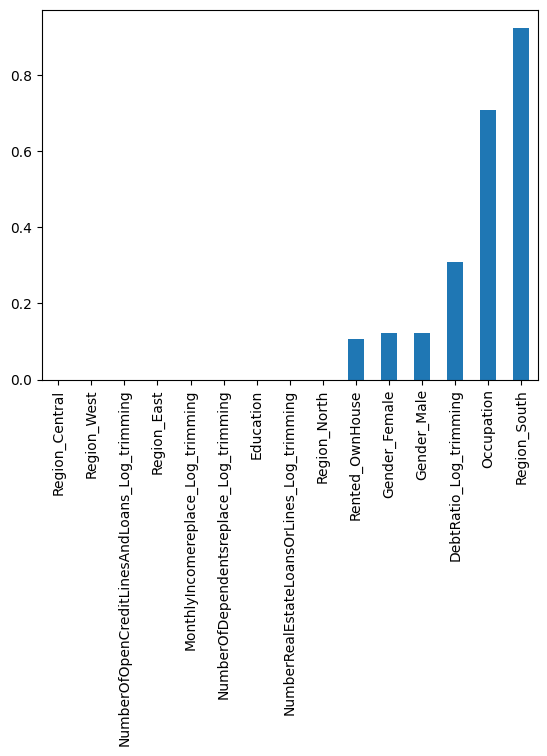

In [ ]:
p_value.sort_values(ascending=True).plot.bar()

In [ ]:
X_train_cleaned.columns

Index(['DebtRatio_Log_trimming',
       'NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
X_train_cleaned=X_train_cleaned.drop(['Rented_OwnHouse','Gender_Female','Gender_Male','Region_South','Occupation','DebtRatio_Log_trimming'],axis=1)

X_test_cleaned=X_test_cleaned.drop(['Rented_OwnHouse','Gender_Female','Gender_Male','Region_South','Occupation','DebtRatio_Log_trimming'],axis=1)

In [ ]:
# after completing feature selection final data
X_train_cleaned.sample(10)

,NumberOfOpenCreditLinesAndLoans_Log_trimming,NumberRealEstateLoansOrLines_Log_trimming,MonthlyIncomereplace_Log_trimming,NumberOfDependentsreplace_Log_trimming,Region_Central,Region_East,Region_North,Region_West,Education
103945,2.397895,1.098612,7.601402,0.000000,0.0,0.0,0.0,0.0,2.0
77725,2.302585,0.693147,8.817446,0.693147,0.0,1.0,0.0,0.0,3.0
115533,2.639057,0.693147,9.852247,1.098612,0.0,0.0,1.0,0.0,1.0
129289,1.791759,0.693147,9.190240,1.609438,0.0,1.0,0.0,0.0,3.0
94904,1.386294,0.000000,9.059634,0.000000,1.0,0.0,0.0,0.0,4.0
123865,2.197225,0.000000,8.019942,1.098612,0.0,0.0,0.0,1.0,4.0
37324,2.197225,1.098612,7.783641,0.000000,0.0,0.0,0.0,0.0,1.0
124280,2.564949,0.693147,8.039480,0.000000,0.0,0.0,1.0,0.0,3.0
14974,1.609438,1.386294,9.028099,0.000000,1.0,0.0,0.0,0.0,4.0
111933,2.302585,0.693147,8.588769,1.098612,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_cleaned.shape

(135000, 9)

In [ ]:
X_test_cleaned.sample(10)

,NumberOfOpenCreditLinesAndLoans_Log_trimming,NumberRealEstateLoansOrLines_Log_trimming,MonthlyIncomereplace_Log_trimming,NumberOfDependentsreplace_Log_trimming,Region_Central,Region_East,Region_North,Region_West,Education
1841,2.564949,1.386294,10.339219,0.693147,1.0,0.0,0.0,0.0,0.0
7984,2.397895,1.098612,8.136518,0.000000,0.0,0.0,0.0,1.0,4.0
3130,0.752039,0.000000,9.342859,1.386294,0.0,0.0,1.0,0.0,0.0
10052,1.609438,0.693147,9.162620,1.098612,1.0,0.0,0.0,0.0,0.0
9694,2.833213,0.693147,9.105091,1.098612,0.0,0.0,0.0,1.0,0.0
2440,2.302585,0.000000,8.905173,0.000000,0.0,0.0,1.0,0.0,3.0
4510,2.772589,0.000000,8.111928,0.000000,0.0,0.0,1.0,0.0,1.0
5446,2.079442,0.693147,8.922792,1.098612,0.0,0.0,1.0,0.0,2.0
9686,1.945910,0.693147,7.901377,1.609438,0.0,0.0,1.0,0.0,0.0
12655,2.564949,0.693147,9.259226,0.000000,0.0,0.0,1.0,0.0,3.0


In [ ]:
X_test_cleaned.shape

(15000, 9)

In [ ]:
y_train_n.value_counts()

,count
target,
1,125935
0,9065


In [ ]:
y_train_n=np.array(y_train_n).ravel()
y_train_n

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test_n=np.array(y_test_n).ravel()
y_test_n

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# using upsample we are going to balance the data
!pip install imblearn

In [ ]:
print('Label count for Bad 0= {}'.format(sum(y_train_n==0)))
print('Label count for Good 1= {}'.format(sum(y_train_n==1)))

print()

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=2)
X_train_up,y_train_up= sm.fit_resample(X_train_cleaned,y_train_n)

print('Label count after for train  Bad 0= {}'.format(sum(y_train_up==0)))
print('Label count after for train Good 1 = {}'.format(sum(y_train_up==1)))


Label count for Bad 0= 9065
Label count for Good 1= 125935

Label count after for train  Bad 0= 125935
Label count after for train Good 1 = 125935


In [ ]:
X_train_up.shape


(251870, 9)

In [ ]:
y_train_up.shape

(251870,)

Since the data is balanced we need to work on model development

In [ ]:
def knn_algo(train_x,train_y,test_x,test_y):
 knn = KNeighborsClassifier(n_neighbors=5) # default k_value 5:
 knn.fit(train_x,train_y)
 y_train_pred=knn.predict(train_x)
 y_test_pred=knn.predict(test_x)
 print(f"train accuracy: {accuracy_score(train_y,y_train_pred)} ")
 print(f"test accuracy: {accuracy_score(test_y,y_test_pred)} ")
 print(f"confustion matrix: {confusion_matrix(test_y,y_test_pred)}")
 print(f" classification report: {classification_report(test_y,y_test_pred)}")


In [ ]:
def log_algo(train_x,train_y,test_x,test_y):
 lr=LogisticRegression()
 lr.fit(train_x,train_y)
 y_train_pred=lr.predict(train_x)
 y_test_pred=lr.predict(test_x)
 print(f"train accuracy: {accuracy_score(train_y,y_train_pred)} ")
 print(f"test accuracy: {accuracy_score(test_y,y_test_pred)} ")
 print(f"confustion matrix: {confusion_matrix(test_y,y_test_pred)}")
 print(f" classification report: {classification_report(test_y,y_test_pred)}")

In [ ]:
def nb_algo(train_x,train_y,test_x,test_y):
 nb=GaussianNB()
 nb.fit(train_x,train_y)
 y_train_pred=nb.predict(train_x)
 y_test_pred=nb.predict(test_x)
 print(f"train accuracy: {accuracy_score(train_y,y_train_pred)} ")
 print(f"test accuracy: {accuracy_score(test_y,y_test_pred)} ")
 print(f"confustion matrix: {confusion_matrix(test_y,y_test_pred)}")
 print(f" classification report: {classification_report(test_y,y_test_pred)}")

In [ ]:
def dt_algo(train_x,train_y,test_x,test_y):
 dt=DecisionTreeClassifier()
 dt.fit(train_x,train_y)
 y_train_pred=dt.predict(train_x)
 y_test_pred=dt.predict(test_x)
 print(f"train accuracy: {accuracy_score(train_y,y_train_pred)} ")
 print(f"test accuracy: {accuracy_score(test_y,y_test_pred)} ")
 print(f"confustion matrix: {confusion_matrix(test_y,y_test_pred)}")
 print(f" classification report: {classification_report(test_y,y_test_pred)}")

In [ ]:
def calling(train_x,train_y,test_x,test_y):
  print("-----------knn------------")
  knn_algo(train_x,train_y,test_x,test_y)
  print("-----------logitic------------")
  log_algo(train_x,train_y,test_x,test_y)
  print("-----------navibayes-----------")
  nb_algo(train_x,train_y,test_x,test_y)
  print("-----------desiontree------------")
  dt_algo(train_x,train_y,test_x,test_y)

In [ ]:
calling(X_train_up,y_train_up,X_test_cleaned,y_test_n)

-----------knn------------
train accuracy: 0.906693929408028 
test accuracy: 0.8152666666666667 
confustion matrix: [[  506   455]
 [ 2316 11723]]
 classification report:               precision    recall  f1-score   support

           0       0.18      0.53      0.27       961
           1       0.96      0.84      0.89     14039

    accuracy                           0.82     15000
   macro avg       0.57      0.68      0.58     15000
weighted avg       0.91      0.82      0.85     15000

-----------logitic------------
train accuracy: 0.724421328463096 
test accuracy: 0.6727333333333333 
confustion matrix: [[ 763  198]
 [4711 9328]]
 classification report:               precision    recall  f1-score   support

           0       0.14      0.79      0.24       961
           1       0.98      0.66      0.79     14039

    accuracy                           0.67     15000
   macro avg       0.56      0.73      0.51     15000
weighted avg       0.93      0.67      0.76     15000

----

**Best model**

**aur and roc curve**

aur: area under the curve
roc: rectifier operating charactertics

In [ ]:
#knn

knn_algo=KNeighborsClassifier()
knn_algo.fit(X_train_up,y_train_up)
knn_pred=knn_algo.predict(X_test_cleaned)

#logistic
lr_algo=LogisticRegression()
lr_algo.fit(X_train_up,y_train_up)
lr_pred=lr_algo.predict(X_test_cleaned)

#naive bayes

nb_algo=GaussianNB()
nb_algo.fit(X_train_up,y_train_up)
nb_pred=nb_algo.predict(X_test_cleaned)

#Decision tree

dt_algo=DecisionTreeClassifier()
dt_algo.fit(X_train_up,y_train_up)
dt_pred=dt_algo.predict(X_test_cleaned)

In [ ]:
# Give the model outcomes to auc and roc curve

fpr_knn,tpr_knn,threshold= roc_curve(y_test_n,knn_pred)
fpr_lr,tpr_lr,threshold= roc_curve(y_test_n,lr_pred)
fpr_nb,tpr_nb,threshold= roc_curve(y_test_n,nb_pred)
fpr_dt,tpr_dt,threshold= roc_curve(y_test_n,dt_pred)


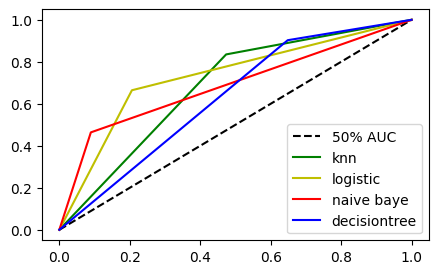

In [ ]:
plt.figure(figsize=(5,3))

plt.plot([0,1],[0,1],'k--',label= '50% AUC')
plt.plot(fpr_knn,tpr_knn,color='g',label="knn")
plt.plot(fpr_lr,tpr_lr,color='y',label="logistic")
plt.plot(fpr_nb,tpr_nb,color='r',label="naive baye")
plt.plot(fpr_dt,tpr_dt,color='b',label="decisiontree")
plt.legend(loc=0)
plt.show()


In [ ]:
# final the Best model is Logistic regression


In [ ]:
X_train_up.columns

Index(['NumberOfOpenCreditLinesAndLoans_Log_trimming',
       'NumberRealEstateLoansOrLines_Log_trimming',
       'MonthlyIncomereplace_Log_trimming',
       'NumberOfDependentsreplace_Log_trimming', 'Region_Central',
       'Region_East', 'Region_North', 'Region_West', 'Education'],
      dtype='object')

**New data point**

In [ ]:
if lr_algo.predict([[4.2,3,1200,2,0,0,1,0,1]])[0]==1:
  print("good customer")
else:
    print("bad customer")


good customer


**save the model**

In [ ]:
import pickle

In [ ]:
with open('Credit_card_project.pkl','wb')as f:
  pickle.dump(lr_algo,f)